# RNN 순환 신경망 

In [ ]:
기억을 갖는다. 

In [ ]:
가중치 3개를 갖는다. 

In [ ]:
패딩, 모델 입력하려면 샘플의 길이를 동일하게 맞춰야 함 . 
이것을 패딩작업이라고 한다. 보통 숫자 0 크기를 맞춰줘 , 

In [1]:
import numpy as np

In [2]:
timesteps = 100
input_features = 32
output_features = 64 

In [5]:
inputs = np.random.random((timesteps,input_features))

inputs

array([[0.85563869, 0.09430401, 0.60487987, ..., 0.06413753, 0.58211465,
        0.1365547 ],
       [0.75524066, 0.5375986 , 0.63462854, ..., 0.59161785, 0.5228551 ,
        0.44812598],
       [0.36994721, 0.40828176, 0.80711936, ..., 0.42560962, 0.85813793,
        0.25826291],
       ...,
       [0.9465052 , 0.37262174, 0.25403225, ..., 0.28651396, 0.89350936,
        0.8497665 ],
       [0.97265001, 0.03091061, 0.16441149, ..., 0.59417105, 0.5123855 ,
        0.60279291],
       [0.25085399, 0.67199331, 0.72396791, ..., 0.83275053, 0.31298219,
        0.5551519 ]])

In [6]:
state_t = np.zeros((output_features))

In [17]:
W = np.random.random((output_features,input_features )) # 64,32
U = np.random.random((output_features,output_features)) # 업데이트 (64x64)
b = np.random.random((output_features)) # 바이어스 64 
# 필요 

In [10]:
sucessive_outputs = []

In [18]:
for input_t in inputs:
    output_t = np.tanh(np.dot(W,input_t) + np.dot(U, state_t) + b)
    sucessive_outputs.append(output_t)
    state_t = output_t
    
final_output_sequence = np.stack(sucessive_outputs, axis = 0 )

In [21]:
type(sucessive_outputs)

list

In [23]:
final_output_sequence

array([[0.99999963, 0.99999912, 0.99998169, ..., 0.99997875, 0.99996247,
        0.9999784 ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [46]:
from tensorflow.keras.layers import SimpleRNN , Embedding ,Dense 
from tensorflow.keras.models import Sequential


In [27]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [30]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32, return_sequences= True))
model.add(SimpleRNN(32, return_sequences= True))
model.add(SimpleRNN(32, return_sequences= True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [33]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [57]:
num_words = 10000
max_len = 500
batch_size = 32  # 한번에 몇개냐 ? 

In [36]:
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words = num_words)

17464789/17464789 [==============================] - 4s 0us/step


In [43]:
print(len(x_train))
print(pad_x_train.shape) # 2500 500 컬럼 

25000
(25000, 500)


In [40]:
pad_x_train = sequence.pad_sequences(x_train, maxlen= max_len )
pad_x_test = sequence.pad_sequences(x_test, maxlen= max_len ) # 패딩 


In [ ]:
# 패딩을 해준다는 것 

In [47]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))


In [49]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy']) # 문자라서 

In [51]:
history = model.fit(pad_x_train,y_train, epochs = 10 , batch_size = 128, validation_split= 0.2 )

Epoch 1/10
157/157 [==============================] - 17s 75ms/step - loss: 0.6066 - accuracy: 0.6594 - val_loss: 0.4862 - val_accuracy: 0.7676
Epoch 2/10
157/157 [==============================] - 11s 72ms/step - loss: 0.3753 - accuracy: 0.8454 - val_loss: 0.4055 - val_accuracy: 0.8266
Epoch 3/10
157/157 [==============================] - 12s 74ms/step - loss: 0.2927 - accuracy: 0.8847 - val_loss: 0.4062 - val_accuracy: 0.8228
Epoch 4/10
157/157 [==============================] - 11s 72ms/step - loss: 0.2276 - accuracy: 0.9130 - val_loss: 0.4262 - val_accuracy: 0.8156
Epoch 5/10
157/157 [==============================] - 11s 72ms/step - loss: 0.1584 - accuracy: 0.9423 - val_loss: 0.4451 - val_accuracy: 0.8154
Epoch 6/10
157/157 [==============================] - 12s 74ms/step - loss: 0.1082 - accuracy: 0.9619 - val_loss: 0.4948 - val_accuracy: 0.8284
Epoch 7/10
157/157 [==============================] - 11s 73ms/step - loss: 0.0702 - accuracy: 0.9775 - val_loss: 0.6649 - val_accuracy:

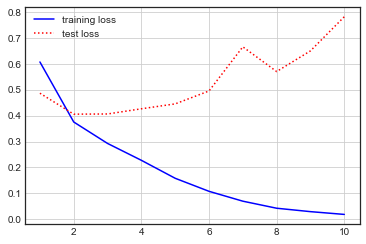

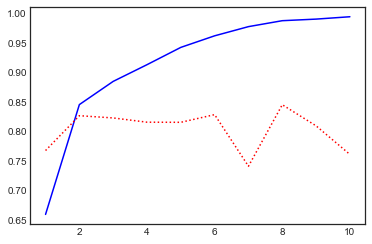

In [55]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn-white')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1) # 0부터 시작하니까 
plt.plot(epochs, loss , 'b-', label= 'training loss')
plt.plot(epochs, val_loss , 'r:', label= 'test loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc , 'b-', label= ' training acc')
plt.plot(epochs, val_acc , 'r:', label= 'val test acc')

In [ ]:
# 들어우는 것 y 데이터 라벨 
# 얼만큼 했냐 에폭 그러면 시계열 적인가 ? 

In [56]:
# 검증
model.evaluate(pad_x_test,y_test)

782/782 [==============================] - 10s 13ms/step - loss: 0.7714 - accuracy: 0.7588


[0.7714076638221741, 0.758840024471283]

In [ ]:
# 500ro 단어만 입력해기 때문에 성능이 낮게 나온다.
# simpleRNN은 긴 시퀀스를 처리 하는데에 적합하지 않다. ! / 

In [ ]:
# lstm , 복잡 입력 3개 출력 3개 /  - 파생된것이 버트 
# 시계열 순차에 대해서 중요한 것만  , / 기억할 수 있는 알고리즘으로 만들어져 있다./
# GRU  출력은 1개 ! /  DRNN  / 

In [ ]:
# 2 연습

In [60]:
from tensorflow.keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt 


In [65]:
(x_train,y_train),(x_test,y_test) = imdb.load_data()

print('train data count: {} '. format(len(x_train)))
print('test data count: {} '. format(len(x_test)))
print(' classes : {} '. format(num_classes))

train data count: 25000 
test data count: 25000 
 classes : 2 


In [66]:
num_classes = len(set(y_train))


In [67]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

In [69]:
print('train data review: ', x_train[0])
print('train label review: ', y_train[0])

train data review:  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
train label revi

In [ ]:
# 0은 긍정 1은 부정 /

In [72]:
review_length = [len(review) for review in x_train]

print( 'max review length : {}'.format(np.max(review_length)))
print( 'mean review length : {}'.format(np.mean(review_length)))
print( 'min review length : {}'.format(np.min(review_length)))


max review length : 2494
mean review length : 238.71364
min review length : 11


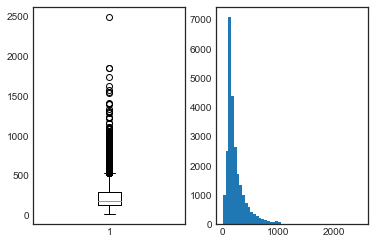

In [74]:
plt.subplot(1,2,1)
plt.boxplot(review_length)
plt.subplot(1,2,2)
plt.hist(review_length, bins = 50)
plt.show()

In [77]:
word_to_index = imdb.get_word_index()
index_to_word = {}
for key,value in word_to_index.items():
    index_to_word[value+3] = key # 왜 3더해 ?

In [82]:
print('빈도수 상위 1등 단어: {} '.format(index_to_word[4])) # 가장많이 나타난 단어 

단어: the 


In [85]:
print('빈도수 상위 1등 단어: {} '.format(index_to_word[6])) # 가장많이 나타난 단어 

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (493792129.py, line 1)

In [97]:
for index, token in enumerate(('<pad>', '<sos>', '<unk>')):
    index_to_word[index] = token
    
    
print(" ".join([index_to_word[index] for index in x_train[0]]))    
    

<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shoul